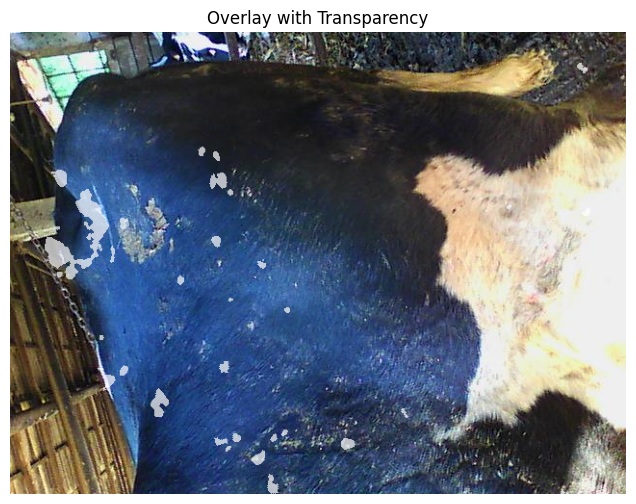

In [25]:
# trasformazione di #FLIR1968.npy in FLIR1968_cold_dirt.ome.tiff
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

filename = 'FLIR2917.npy'
# Load the numpy array from the .npy file
source_cold_npy = os.path.join(
    'archivio_foto_tesi', 'APEER_PRED_binary_masks_cold_dirt(480,640)', filename)
cold_mask_array = np.load(source_cold_npy)
# Save the image as a TIFF file
source_hot_npy = os.path.join(
    'archivio_foto_tesi', 'APEER_PRED_binary_masks_hot_dirt(480,640)', filename)
hot_mask_array = np.load(source_hot_npy)

source_rgb_npy = os.path.join(
    'archivio_foto_tesi', 'pure_rgb_matrices_(480,640,3)', filename)
color_image = np.load(source_rgb_npy)

colored_hot_mask = np.zeros((480, 640, 4), dtype=np.float32)
colored_hot_mask[:, :, 0] = 255
colored_hot_mask[:, :, 1] = 0
colored_hot_mask[:, :, 2] = 0
colored_hot_mask[:, :, 3] = np.where(hot_mask_array == 255, 0.4, 0.0)
colored_cold_mask = np.zeros((480, 640, 4), dtype=np.float32)
colored_cold_mask[:, :, 0] = 0
colored_cold_mask[:, :, 1] = 255
colored_cold_mask[:, :, 2] = 0
colored_cold_mask[:, :, 3] = np.where(cold_mask_array == 255, 0.4, 0.0)
# Step 1: Create the overlay matrix
# Initialize overlay with shape (480, 640, 4)
overlay = np.zeros((480, 640, 4), dtype=np.float32)
# Normalize RGB channels to [0, 1] range
overlay[:, :, :3] = color_image / 255.0
# Set alpha channel (transparency)
overlay[:, :, 3] = np.where((hot_mask_array == 255) |
                            (cold_mask_array == 255), 0.3, 1.0)


# Step 2: Plot the overlay
plt.figure(figsize=(8, 6))
plt.imshow(overlay)
plt.axis('off')  # Hide axes for a clean visualization
plt.title("Overlay with Transparency")
plt.show()